In [49]:
import os, time, math
import math
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.models import Model
#from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble
import sklearn.metrics as metrics 
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn.metrics import mean_absolute_percentage_error
import xgboost as xgb
from xgboost import XGBRegressor
import math
from tune_sklearn import TuneGridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model, tree, ensemble

In [50]:
# Helper Function
def rmse(predictions, targets):
    differences = predictions - targets                       #the DIFFERENCEs.
    differences_squared = differences ** 2                    #the SQUAREs of ^
    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^
    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^
    return rmse_val

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Run Bike RF model for iputation

In [51]:
bdata0=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_data.csv')
bdata0.head()

,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,latitude,longitude,geometry,min_dist_to_CBD,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,0.0,671,2018,1,65.478571,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,671,2018,2,60.928571,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,671,2018,3,48.907143,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,671,2018,4,52.942857,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,671,2018,5,64.071429,37.79116,-122.45944,POLYGON ((-122.45030116607526 37.7911177158698...,5.15385,...,0,0,0,0,0,0,0,0,0,0


In [52]:
bdata0.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'ID', 'year', 'month', 'AASHTO_MADT',
       'latitude', 'longitude', 'geometry', 'min_dist_to_CBD',
       'Commercial Area ', 'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'grass Area ', 'Distance to grass area',
       'forest Area ', 'Distance to forest area', 'education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'water Area',
       'Distance to water area', 'park Area ', 'Distance to Park Center',
       'School', 'min_dist_to_school', 'college', 'min_dist_to_college',
       'University', 'min_dist_to_university', 'pct_white',
       'pct_African_American', 'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employme

In [53]:
# lets keep the data that we need for model tunning
bdata=bdata0.drop(['Unnamed: 0_x','Unnamed: 0.1', 'Unnamed: 0', 'ID', 'year', 'latitude', 'longitude', 'geometry','grass Area ', 'Distance to grass area','grass Area ','education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'Distance to grass area', 'Total Commuter','Name', 'name', 'highway', 'Bicycle_Fa', 'Unnamed: 0_y', 'edgeUID',
       'osmId', 'edge_uid', 'osmId.1', 'stv_total', 'stv_com_total',
       'stv_rec_total', 'stv_com_ratio', 'stv_rec_ratio', 'date',
       'days_in_month',],axis=1)
bdata.columns

Index(['month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path', 'Bike Route', 'Bike Lane', 'Cycle Track',
       'Trail', 'cycleway', 'secondary', 'tertiary', 'primary', 'residential',
       

In [54]:
bdata['AASHTO_MADT'].describe()

count    4291.000000
mean      448.687883
std       577.561792
min         5.235714
25%        97.310714
50%       208.807143
75%       593.585714
max      5235.757143
Name: AASHTO_MADT, dtype: float64

In [55]:
bdata0.groupby(['month'])['ID'].count()

month
1     324
2     344
3     341
4     361
5     377
6     385
7     384
8     369
9     373
10    366
11    322
12    345
Name: ID, dtype: int64

In [56]:
# split data into X dataframe and Y dataframe:
X_data1 = bdata.drop("AASHTO_MADT", axis=1)
Y_data1 = bdata["AASHTO_MADT"]
print(f"X_data.shape: {X_data1.shape} Y_data.shape: {Y_data1.shape}")

X_data.shape: (4291, 49) Y_data.shape: (4291,)


In [57]:
features1 = bdata.drop("AASHTO_MADT", axis=1)
feature_list1 = list(features1.columns)

In [58]:
X1 = np.asarray(X_data1)
Y1 = np.asarray(Y_data1)
print(f"X.shape: {X1.shape} Y.shape: {Y1.shape}")

X.shape: (4291, 49) Y.shape: (4291,)


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X1, Y1, test_size=0.2,random_state=94704)

In [60]:
#https://github.com/ray-project/tune-sklearn?fbclid=IwAR11a7ctTD3l8kzS3zyyZJOn8p_KnAna8p0GZ1TnPRdeO3e0U9Fo8ZOFGQ0
from tune_sklearn import TuneGridSearchCV
parameters = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [61]:
# Tune the RF model
tune_search = TuneGridSearchCV(
    RandomForestRegressor(),
    parameters,
    early_stopping="MedianStoppingRule",
    cv=10,
    max_iters=100
)
tune_model=tune_search.fit(X_train, y_train)

2023-05-12 21:45:03,910	WARNING util.py:244 -- The `reset` operation took 1.663 s, which may be a performance bottleneck.
2023-05-12 21:45:03,946	WARNING util.py:244 -- The `start_trial` operation took 1.700 s, which may be a performance bottleneck.
2023-05-12 21:45:05,646	WARNING util.py:244 -- The `reset` operation took 1.483 s, which may be a performance bottleneck.
2023-05-12 21:45:05,680	WARNING util.py:244 -- The `start_trial` operation took 1.521 s, which may be a performance bottleneck.
2023-05-12 21:45:07,282	WARNING util.py:244 -- The `reset` operation took 1.398 s, which may be a performance bottleneck.
2023-05-12 21:45:07,316	WARNING util.py:244 -- The `start_trial` operation took 1.433 s, which may be a performance bottleneck.
2023-05-12 21:45:09,004	WARNING util.py:244 -- The `reset` operation took 1.321 s, which may be a performance bottleneck.
2023-05-12 21:45:09,015	WARNING util.py:244 -- The `start_trial` operation took 1.332 s, which may be a performance bottleneck.


C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scal

C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Md Mintu Miah\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
(<ray.tune.trainable.util._Trainable object at 0x0000017E83837E20> pid=19560) 2023-05-12 21:54:41,206	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_cecc7c02c71d4feeb6bfb569a0fe3e18
(<ray.tune.trainable.util._Trainable object at 0x0000017E83837E20> pid=19560) 2023-05-12 21:54:41,207	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 63, '_timesteps_total': None, '_time_total': 77.01420092582703, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x000001A4291D7DF0> pid=24412) 2023-05-12 21:54:41,432	INFO trainable.py:766 -- Restored on 1

In [63]:
tune_model.best_params_

{'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [64]:
# define Random Forest model that will rotate for each month of test
#def BRF prediction(bdata):
    
# Now we perform KFold:
#m=[1,2,3,4,5,6,7,8,9,10,11,12] # month
bdata
month_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []

for i in range(1,13):
    train=bdata.loc[bdata['month']!=i]
    test=bdata.loc[bdata['month']==i]
    X_train=train.drop(["AASHTO_MADT"],axis=1)
    Y_train=train[["AASHTO_MADT"]]
    X_test=test.drop(["AASHTO_MADT"],axis=1)
    Y_test=test[["AASHTO_MADT"]]
    brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)
    # Train the model on training data
    train_predictions = brf_model.predict(X_train)
    test_predictions = brf_model.predict(X_test)
    predictions_df = pd.DataFrame([X_test.index,brf_model.predict(X_test),Y_test]).transpose()
    train_mape = mean_absolute_percentage_error(Y_train, train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_test, test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_train, train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_train, train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_test, test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_test >= 0, Y_test <=300], axis=0)
    med_Y_test_mask = np.all([Y_test >= 301, Y_test <=1000], axis=0)
    high_Y_test_mask = np.all([Y_test >= 1001],axis=0)

    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))


    print(
        f"------------------------------------------month {month_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y_test[low_Y_test_mask].shape[0]}), MED (n={Y_test[med_Y_test_mask].shape[0]}), HIGH (n={Y_test[high_Y_test_mask].shape[0]}), TOTAL IN Month (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    month_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for RF Regression 12 month:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 12):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        
    

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 1------------------------------------------
	Train MAE: 86.11487040082753	Score Loss: 80.91672452747073
	Train RMSE: 205.49152144789903	Score RMSE: 162.7623856923592
	Train MAPE: 421.90704310303613	Score MAPE: 482.4400808638254
	Train R2:   0.8769865076105058	Score R2: 0.8733341900965191

	3-VOLUME SCORES: LOW (n=205), MED (n=84), HIGH (n=35), TOTAL IN Month (n=324)
	Low Loss: 47.39385242059549	Med Loss: 114.34610456864894	High Loss: 197.03446334034098
	Low RMSE: 134.0155501783533	Med RMSE: 150.15333169394836	High RMSE: 293.13946995746124
	Low MAPE: 234.68541389261458	Med MAPE: 43.7981489905443	High MAPE: 27.766875522679157
	Low R2:   -2.1848239842009876	Med R2: 0.30668339454751636	High R2: 0.30668339454751636


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 2------------------------------------------
	Train MAE: 84.37882235356305	Score Loss: 112.75578248467693
	Train RMSE: 205.9720808974589	Score RMSE: 217.93174810563994
	Train MAPE: 422.7226008878131	Score MAPE: 457.985524089034
	Train R2:   0.875229022663718	Score R2: 0.8144997991206718

	3-VOLUME SCORES: LOW (n=218), MED (n=90), HIGH (n=36), TOTAL IN Month (n=344)
	Low Loss: 47.39294856539269	Med Loss: 142.51749462008652	High Loss: 434.1597742129296
	Low RMSE: 123.11535178680525	Med RMSE: 205.44068453733396	High RMSE: 506.4906817809967
	Low MAPE: 214.55587171502853	Med MAPE: 50.64365637772536	High MAPE: 33.34127323947601
	Low R2:   -1.6535949455467964	Med R2: 0.07772866938141754	High R2: 0.07772866938141754


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 3------------------------------------------
	Train MAE: 86.53299252015586	Score Loss: 81.50000334484136
	Train RMSE: 207.1754682991194	Score RMSE: 172.44497929820164
	Train MAPE: 428.3761473735807	Score MAPE: 423.53124270035937
	Train R2:   0.8748331725745356	Score R2: 0.8654169578996175

	3-VOLUME SCORES: LOW (n=211), MED (n=94), HIGH (n=35), TOTAL IN Month (n=341)
	Low Loss: 43.300513289047444	Med Loss: 121.56510955398207	High Loss: 206.17080596552913
	Low RMSE: 141.91533509493703	Med RMSE: 176.87741222745416	High RMSE: 290.3143750830221
	Low MAPE: 197.59435350415166	Med MAPE: 45.142482922829906	High MAPE: 29.239320079796453
	Low R2:   -2.788182752844913	Med R2: 0.049821896939090005	High R2: 0.049821896939090005


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 4------------------------------------------
	Train MAE: 85.5193201310915	Score Loss: 118.45623090732525
	Train RMSE: 206.42651781940177	Score RMSE: 238.45212628727168
	Train MAPE: 429.59718122680624	Score MAPE: 362.1788511353891
	Train R2:   0.87280245587047	Score R2: 0.8206474893924554

	3-VOLUME SCORES: LOW (n=223), MED (n=96), HIGH (n=42), TOTAL IN Month (n=361)
	Low Loss: 59.91026394729191	Med Loss: 178.3220967774805	High Loss: 292.47117158714747
	Low RMSE: 174.85197200307013	Med RMSE: 278.9584294909735	High RMSE: 385.3852046209859
	Low MAPE: 177.90430218661976	Med MAPE: 50.436830981782364	High MAPE: 36.98998862061005
	Low R2:   -4.134562940899961	Med R2: -0.868040178326579	High R2: -0.868040178326579


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 5------------------------------------------
	Train MAE: 85.06230787958323	Score Loss: 109.28220092286405
	Train RMSE: 206.18708999064907	Score RMSE: 242.98642117762006
	Train MAPE: 427.89788745602414	Score MAPE: 385.48429523706625
	Train R2:   0.872227005187828	Score R2: 0.82712151629774

	3-VOLUME SCORES: LOW (n=230), MED (n=99), HIGH (n=48), TOTAL IN Month (n=377)
	Low Loss: 46.33897582323181	Med Loss: 145.09392292846437	High Loss: 337.02347788871793
	Low RMSE: 137.41860603399607	Med RMSE: 218.33401247063955	High RMSE: 524.3327091800487
	Low MAPE: 173.9957109462213	Med MAPE: 53.328685133127884	High MAPE: 37.8084660540543
	Low R2:   -2.2762278642287086	Med R2: -0.10084098973376299	High R2: -0.10084098973376299


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 6------------------------------------------
	Train MAE: 85.65020749578353	Score Loss: 114.25827093792073
	Train RMSE: 204.45839642263743	Score RMSE: 252.82570065459362
	Train MAPE: 423.6926695796555	Score MAPE: 401.882669830309
	Train R2:   0.8719760339131347	Score R2: 0.8400318112759744

	3-VOLUME SCORES: LOW (n=215), MED (n=107), HIGH (n=63), TOTAL IN Month (n=385)
	Low Loss: 46.742853367500715	Med Loss: 126.62084719582619	High Loss: 323.6712728116418
	Low RMSE: 204.50985903374368	Med RMSE: 181.58214375058927	High RMSE: 438.05647056570575
	Low MAPE: 177.79643279770102	Med MAPE: 47.555580276057455	High MAPE: 40.84513429366581
	Low R2:   -5.973684992345864	Med R2: 0.20152425858166845	High R2: 0.20152425858166845


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 7------------------------------------------
	Train MAE: 83.00881504853335	Score Loss: 143.55276518312073
	Train RMSE: 195.07910933459905	Score RMSE: 346.54511384664494
	Train MAPE: 423.23144344447456	Score MAPE: 378.12244092926636
	Train R2:   0.8791432448701865	Score R2: 0.765313353824364

	3-VOLUME SCORES: LOW (n=212), MED (n=102), HIGH (n=70), TOTAL IN Month (n=384)
	Low Loss: 53.178971276953774	Med Loss: 132.98415377147538	High Loss: 432.65623192733807
	Low RMSE: 213.13370299773516	Med RMSE: 192.52187477356088	High RMSE: 683.5308204085283
	Low MAPE: 180.94351888883807	Med MAPE: 45.5693769765776	High MAPE: 39.32394517365614
	Low R2:   -6.53920150571375	Med R2: 0.06546468727581689	High R2: 0.06546468727581689


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 8------------------------------------------
	Train MAE: 84.36250257617658	Score Loss: 122.68876575165866
	Train RMSE: 196.38567657278725	Score RMSE: 327.87882130721243
	Train MAPE: 422.11022246499164	Score MAPE: 410.36862238216776
	Train R2:   0.8785076324634405	Score R2: 0.7838918417717624

	3-VOLUME SCORES: LOW (n=206), MED (n=100), HIGH (n=62), TOTAL IN Month (n=369)
	Low Loss: 39.556470047387165	Med Loss: 115.109107132106	High Loss: 404.83565922379466
	Low RMSE: 174.30559838847847	Med RMSE: 177.97244870399845	High RMSE: 695.3764610795213
	Low MAPE: 184.91750089342926	Med MAPE: 48.816761475894936	High MAPE: 39.247627281294854
	Low R2:   -4.223949419633199	Med R2: 0.1553084665808454	High R2: 0.1553084665808454


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 9------------------------------------------
	Train MAE: 85.43825056580978	Score Loss: 125.92164978157552
	Train RMSE: 201.61370338211586	Score RMSE: 293.66337371057375
	Train MAPE: 423.4027959756059	Score MAPE: 445.9558984696132
	Train R2:   0.8759368859737637	Score R2: 0.7807446485318594

	3-VOLUME SCORES: LOW (n=211), MED (n=108), HIGH (n=53), TOTAL IN Month (n=373)
	Low Loss: 61.8178441228405	Med Loss: 150.5030267399088	High Loss: 333.17983240164034
	Low RMSE: 248.20899899443205	Med RMSE: 219.03245347327476	High RMSE: 513.7016599239887
	Low MAPE: 223.4124537855155	Med MAPE: 56.877978750413384	High MAPE: 42.36766761129934
	Low R2:   -9.459981032144208	Med R2: -0.14096473668974663	High R2: -0.14096473668974663


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 10------------------------------------------
	Train MAE: 85.84391376661338	Score Loss: 107.91301336126372
	Train RMSE: 205.7019202433683	Score RMSE: 222.3352853411959
	Train MAPE: 427.56282177445104	Score MAPE: 387.7536354880366
	Train R2:   0.8711405330909218	Score R2: 0.8723005946173734

	3-VOLUME SCORES: LOW (n=216), MED (n=96), HIGH (n=54), TOTAL IN Month (n=366)
	Low Loss: 52.66916830191259	Med Loss: 113.85579221880768	High Loss: 318.32345340747895
	Low RMSE: 150.4687138056282	Med RMSE: 166.14901866955014	High RMSE: 442.0474792321669
	Low MAPE: 175.76485203781675	Med MAPE: 47.69705175979312	High MAPE: 40.238999814738285
	Low R2:   -2.8408668877178846	Med R2: 0.30719789370047457	High R2: 0.30719789370047457


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 11------------------------------------------
	Train MAE: 86.47925208493801	Score Loss: 121.44181331525559
	Train RMSE: 206.4914182559664	Score RMSE: 237.58203789192592
	Train MAPE: 425.95529894721847	Score MAPE: 476.17169105037016
	Train R2:   0.875667408115091	Score R2: 0.7367327302836368

	3-VOLUME SCORES: LOW (n=194), MED (n=94), HIGH (n=34), TOTAL IN Month (n=322)
	Low Loss: 53.63939908807667	Med Loss: 162.24575237696388	High Loss: 395.50352179384765
	Low RMSE: 133.57702135707524	Med RMSE: 256.14486174386496	High RMSE: 501.3657019461333
	Low MAPE: 220.38818996453804	Med MAPE: 54.84893512929956	High MAPE: 39.62656083649201
	Low R2:   -2.221597292196854	Med R2: -0.8973664878628727	High R2: -0.8973664878628727


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\1864741147.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=110,min_samples_split=10,min_samples_leaf=2,max_features='auto').fit(X_train, Y_train)


------------------------------------------month 12------------------------------------------
	Train MAE: 84.76126573968322	Score Loss: 178.01294365245272
	Train RMSE: 206.40799289249313	Score RMSE: 312.7101033721696
	Train MAPE: 422.3180173887752	Score MAPE: 590.1721174816686
	Train R2:   0.8780220988245723	Score R2: 0.2699751789953643

	3-VOLUME SCORES: LOW (n=223), MED (n=99), HIGH (n=23), TOTAL IN Month (n=345)
	Low Loss: 115.11773668885202	Med Loss: 272.8831079317286	High Loss: 379.4688084017851
	Low RMSE: 257.2290967902412	Med RMSE: 372.21133637327625	High RMSE: 478.4912960469314
	Low MAPE: 371.27351287468235	Med MAPE: 69.43818880728155	High MAPE: 37.98598879611176
	Low R2:   -11.942410387260251	Med R2: -3.645904956656916	High R2: -3.645904956656916


Low MAE Average: 55.58824974492356 +/- 18.985693711186496
Low RMSE Average: 174.39581720537464 +/- 44.38342584288583
Low MAPE Average: 211.10267612392974 +/- 52.50028406166496
Low R2 Average: -4.686590333727781 +/- 3.1009987004919193

In [65]:
importances = list(brf_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(features1, round(importance, 4)) for feature, importance in zip(feature_list1, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

<AxesSubplot:title={'center':'Pool-2019 Random Forest Variable Importances'}, xlabel='Variable', ylabel='Importance'>

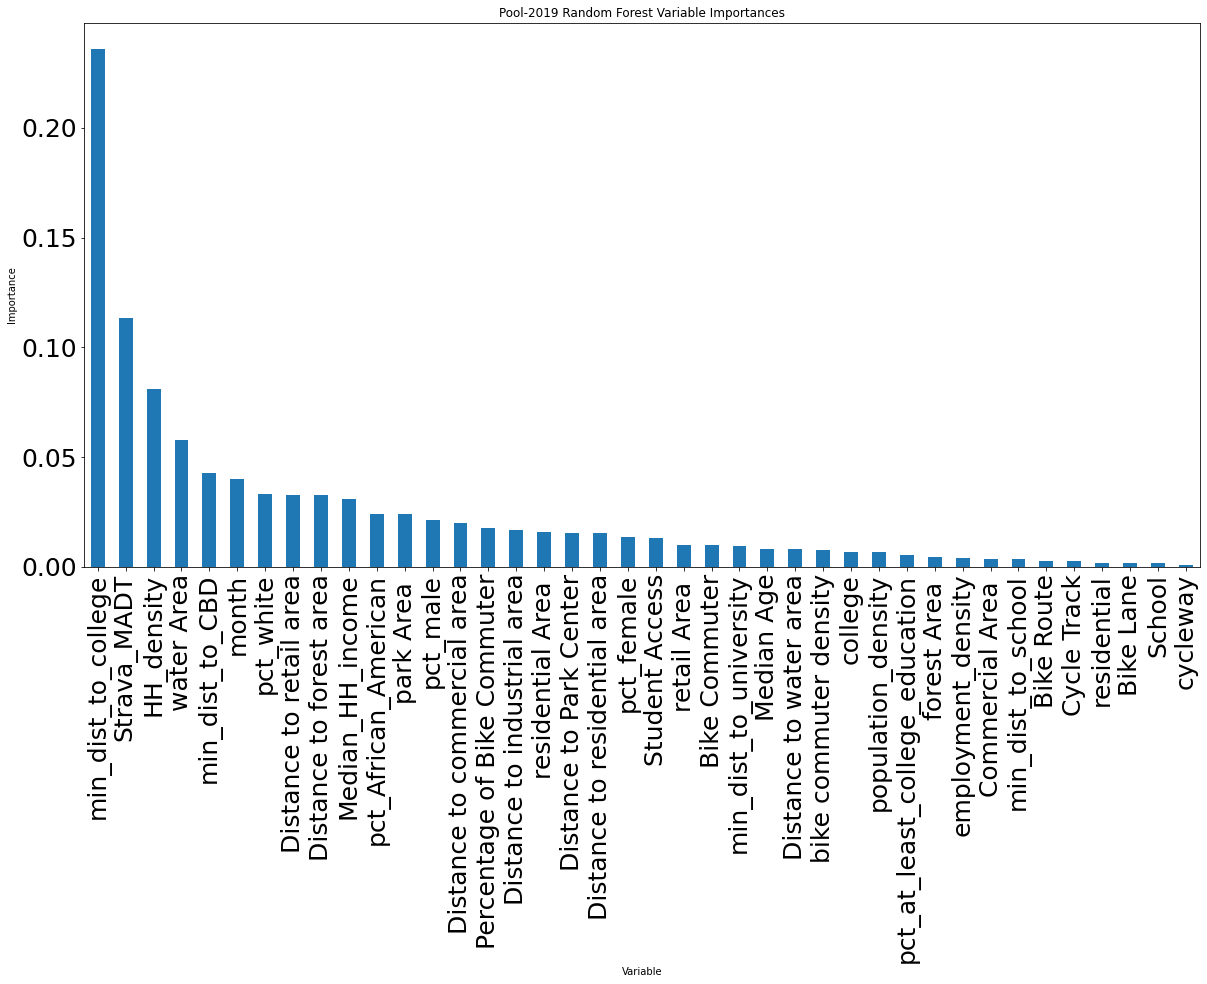

In [66]:
feature_importances_df = pd.DataFrame(brf_model.feature_importances_, index=X_data1.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_df[0:40].plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                            title= "Pool-2019 Random Forest Variable Importances", ylabel="Importance", xlabel="Variable")

In [68]:
feature_importances_dfb=feature_importances_df.rename(columns={'Importance': 'Bike_Var_Importance'})
feature_importances_dfb['var']=feature_importances_dfb.index
feature_importances_dfb.head()

,Bike_Var_Importance,var
min_dist_to_college,0.235870,min_dist_to_college
Strava_MADT,0.113325,Strava_MADT
HH_density,0.080894,HH_density
water Area,0.057594,water Area
min_dist_to_CBD,0.042610,min_dist_to_CBD


In [69]:
#feature_importances_df.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_RF_model_Variable_Importance.csv')

# Apply bike RF Model

In [70]:
# read 
bapp=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_imputation_model_application_data.csv')
bapp['Path'] = np.where(bapp['Bicycle_Fa']=='Path', 1, 0)
bapp['Bike Route'] = np.where(bapp['Bicycle_Fa']=='Bike Route', 1, 0)
bapp['Bike Lane'] = np.where(bapp['Bicycle_Fa']=='Bike Lane', 1, 0)
bapp['Cycle Track'] = np.where(bapp['Bicycle_Fa']=='Cycle Track', 1, 0)
bapp['Trail'] = np.where(bapp['Bicycle_Fa']=='Trail', 1, 0)
bapp['Path'] = np.where(bapp['highway']=='Path', 1, 0)
bapp['cycleway'] = np.where(bapp['highway']=='cycleway', 1, 0)
bapp['secondary'] = np.where(bapp['highway']=='secondary', 1, 0)
bapp['tertiary'] = np.where(bapp['highway']=='tertiary', 1, 0)
bapp['primary'] = np.where(bapp['highway']=='primary', 1, 0)
bapp['residential'] = np.where(bapp['highway']=='residential', 1, 0)
bapp['service'] = np.where(bapp['highway']=='service', 1, 0)
bapp['trunk'] = np.where(bapp['highway']=='trunk', 1, 0)
bapp1=bapp[['month','min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Bike Commuter', 'Percentage of Bike Commuter', 'bike commuter density',
       'Strava_MADT', 'Path',  'Bike Route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]

In [71]:
track=bapp[["ID"]]

In [72]:
bapp.head()

,Unnamed: 0.1,ID,latitude,longitude,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,1127,37.796165,-122.419490,POLYGON ((-122.4103506127677 37.79611961207228...,3.019345,0.002189,0.249510,0.165813,0.131352,...,0,0,0,0,0,0,1,0,0,0
1,1,2415,37.774200,-122.436295,POLYGON ((-122.42715829014239 37.7741559374201...,4.642047,0.000000,0.687274,0.087677,0.155897,...,1,0,0,0,0,0,1,0,0,0
2,2,2696,33.636400,-117.573600,POLYGON ((-117.5649623942388 33.63601951720258...,30.272075,0.000000,4.698224,0.000000,5.178166,...,0,0,1,1,0,0,0,0,0,0
3,3,2735,37.851585,-122.260410,POLYGON ((-122.25126407202679 37.8515272002856...,3.516737,0.008472,0.261220,0.035638,0.030689,...,1,0,0,0,0,0,0,0,1,0
4,4,3563,32.991085,-117.271470,POLYGON ((-117.26290023488116 32.9906902025036...,77.836301,0.004015,0.124383,0.014682,0.099479,...,1,0,0,0,0,0,1,0,0,0


In [73]:
bapp1.shape

(153, 49)

In [74]:
predictions = brf_model.predict(bapp1)
predictions1 = pd.DataFrame({'Predicted_MADBT': predictions})
pred=pd.concat([bapp1,predictions1, track],axis=1)
pred.head()

,month,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,residential Area,Distance to residential area,...,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk,Predicted_MADBT,ID
0,1,3.019345,0.002189,0.249510,0.165813,0.131352,0.000000,1.762761,0.000472,0.490861,...,0,0,0,0,1,0,0,0,457.227150,1127
1,1,4.642047,0.000000,0.687274,0.087677,0.155897,0.000000,1.156915,0.012237,0.460795,...,0,0,0,0,1,0,0,0,1289.411405,2415
2,1,30.272075,0.000000,4.698224,0.000000,5.178166,0.000000,4.852471,0.013678,0.223595,...,1,1,0,0,0,0,0,0,296.535079,2696
3,1,3.516737,0.008472,0.261220,0.035638,0.030689,0.000676,0.355484,0.137718,0.073922,...,0,0,0,0,0,0,1,0,349.469931,2735
4,1,77.836301,0.004015,0.124383,0.014682,0.099479,0.000000,5.174904,0.000000,1.881231,...,0,0,0,0,1,0,0,0,496.786274,3563


In [75]:
pred_save=pred[['ID','month','Predicted_MADBT']]
pred_save.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_MADBT_Prediction.csv')

In [76]:
pred_save['Predicted_MADBT'].describe()

count     153.000000
mean      463.904945
std       527.694470
min        10.546789
25%       111.342056
50%       293.472056
75%       496.786274
max      2578.360748
Name: Predicted_MADBT, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Predicted_MADBT'>

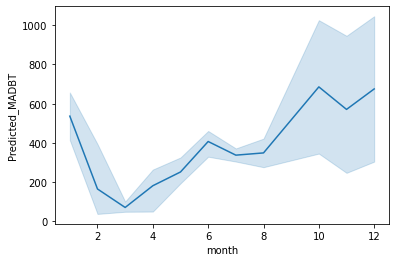

In [77]:
sns.lineplot(data=pred_save, x="month", y="Predicted_MADBT")

# Run Pedestrian RF model for iputation

In [78]:
pdata0=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_imputation_model_data.csv')
pdata0.head()

,Unnamed: 0.1,Unnamed: 0_x,ID,year,month,AASHTO_MADT,latitude,longitude,geometry,min_dist_to_CBD,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
0,0,0.0,572,2018,1,188.971429,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,572,2018,2,213.142857,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,572,2018,3,235.550000,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
3,3,3.0,572,2018,4,221.250000,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,572,2018,5,220.435714,37.798027,-122.467575,POLYGON ((-122.46300515156133 37.7980062588424...,5.437166,...,0,0,0,0,0,0,0,0,0,0


In [79]:
pdata0['ID'].nunique()

208

In [80]:
# lets keep the data that we need for model tunning
pdata=pdata0[['month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path',  'Bike Route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]
pdata.columns

Index(['month', 'AASHTO_MADT', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path', 'Bike Route', 'Bike Lane', 'Cycle Track',
       'Trail', 'cycleway', 'secondary', 'tertiary', 'primary', 'residential',
       

In [81]:
# split data into X dataframe and Y dataframe:
X_data2 = pdata.drop("AASHTO_MADT", axis=1)
Y_data2 = pdata["AASHTO_MADT"]
print(f"X_data.shape: {X_data2.shape} Y_data.shape: {Y_data2.shape}")

X_data.shape: (3788, 49) Y_data.shape: (3788,)


In [82]:
features2 = pdata.drop("AASHTO_MADT", axis=1)
feature_list2 = list(features2.columns)

In [83]:
X2 = np.asarray(X_data2)
Y2 = np.asarray(Y_data2)
print(f"X.shape: {X2.shape} Y.shape: {Y2.shape}")

X.shape: (3788, 49) Y.shape: (3788,)


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X2, Y2, test_size=0.2,random_state=94704)

In [85]:
# Tune the RF model
tune_search = TuneGridSearchCV(
    RandomForestRegressor(),
    parameters,
    early_stopping="MedianStoppingRule",
    cv=10,
    max_iters=100
)
tune_model=tune_search.fit(X_train, y_train)

2023-05-12 22:03:34,204	WARNING util.py:244 -- The `reset` operation took 0.536 s, which may be a performance bottleneck.
2023-05-12 22:03:34,215	WARNING util.py:244 -- The `start_trial` operation took 0.550 s, which may be a performance bottleneck.
2023-05-12 22:03:35,311	WARNING util.py:244 -- The `reset` operation took 0.648 s, which may be a performance bottleneck.
2023-05-12 22:03:35,317	WARNING util.py:244 -- The `start_trial` operation took 0.656 s, which may be a performance bottleneck.
2023-05-12 22:03:38,695	WARNING util.py:244 -- The `reset` operation took 0.556 s, which may be a performance bottleneck.
2023-05-12 22:03:38,705	WARNING util.py:244 -- The `start_trial` operation took 0.567 s, which may be a performance bottleneck.
2023-05-12 22:03:46,890	WARNING util.py:244 -- The `reset` operation took 0.602 s, which may be a performance bottleneck.
2023-05-12 22:03:46,896	WARNING util.py:244 -- The `start_trial` operation took 0.611 s, which may be a performance bottleneck.


(<ray.tune.trainable.util._Trainable object at 0x000002268A6C7E50> pid=10036) 2023-05-12 22:09:34,265	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 98, '_timesteps_total': None, '_time_total': 60.17755651473999, '_episodes_total': None}
(<ray.tune.trainable.util._Trainable object at 0x0000022A7BE97DC0> pid=6472) 2023-05-12 22:09:35,436	INFO trainable.py:766 -- Restored on 127.0.0.1 from checkpoint: C:\Users\MDMINT~1\AppData\Local\Temp\checkpoint_tmp_a5117532a2704e55a9e08afdbc1f7368
(<ray.tune.trainable.util._Trainable object at 0x0000022A7BE97DC0> pid=6472) 2023-05-12 22:09:35,436	INFO trainable.py:775 -- Current state after restoring: {'_iteration': 98, '_timesteps_total': None, '_time_total': 60.30970358848572, '_episodes_total': None}
2023-05-12 22:09:36,012	WARNING util.py:244 -- The `reset` operation took 0.690 s, which may be a performance bottleneck.
2023-05-12 22:09:36,019	WARNING util.py:244 -- The `start_trial` operation took 0.698 s, which may be a p

In [86]:
tune_model.best_params_

{'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [87]:
# define Random Forest model that will rotate for each month of test
#def BRF prediction(bdata):
    
# Now we perform KFold:
#m=[1,2,3,4,5,6,7,8,9,10,11,12] # month
bdata
month_num = 1
rf_MAPE_train = []
rf_MAPE_scores = []
rf_RMSE_train = []
rf_RMSE_scores = []
rf_MAE_train = []
rf_MAE_scores = []
rf_R2_train = []
rf_R2_scores = []

rf_low_MAPE_scores = []
rf_low_RMSE_scores = []
rf_low_MAE_scores = []
rf_low_R2_scores = []

rf_med_MAPE_scores = []
rf_med_RMSE_scores = []
rf_med_MAE_scores = []
rf_med_R2_scores = []

rf_high_MAPE_scores = []
rf_high_RMSE_scores = []
rf_high_MAE_scores = []
rf_high_R2_scores = []
test_pred = []

for i in range(1,13):
    train=pdata.loc[pdata['month']!=i]
    test=pdata.loc[pdata['month']==i]
    X_train=train.drop(["AASHTO_MADT"],axis=1)
    Y_train=train[["AASHTO_MADT"]]
    X_test=test.drop(["AASHTO_MADT"],axis=1)
    Y_test=test[["AASHTO_MADT"]]
    brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)
    # Train the model on training data
    train_predictions = brf_model.predict(X_train)
    test_predictions = brf_model.predict(X_test)
    predictions_df = pd.DataFrame([X_test.index,brf_model.predict(X_test),Y_test]).transpose()
    train_mape = mean_absolute_percentage_error(Y_train, train_predictions)
    rf_MAPE_train.append(train_mape)
    test_mape = mean_absolute_percentage_error(Y_test, test_predictions)
    rf_MAPE_scores.append(test_mape)
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predictions))
    rf_RMSE_train.append(train_rmse)
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predictions))
    rf_RMSE_scores.append(test_rmse)
    train_mae = mean_absolute_error(Y_train, train_predictions)
    rf_MAE_train.append(train_mae)
    test_mae = mean_absolute_error(Y_test, test_predictions)
    rf_MAE_scores.append(test_mae)
    train_r2 = r2_score(Y_train, train_predictions)
    rf_R2_train.append(train_r2)
    score_r2 = r2_score(Y_test, test_predictions)
    rf_R2_scores.append(score_r2)
    test_pred.append(predictions_df)
    appended_data = pd.concat(test_pred)
    # we split the Y[test] into 3 inclusive volumes: low (0-299), medium (300-750), high (>= 751)
    low_Y_test_mask = np.all([Y_test >= 0, Y_test <=300], axis=0)
    med_Y_test_mask = np.all([Y_test >= 301, Y_test <=1000], axis=0)
    high_Y_test_mask = np.all([Y_test >= 1001],axis=0)

    rf_low_MAPE_scores.append(mean_absolute_percentage_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask]))))
    rf_low_MAE_scores.append(mean_absolute_error(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))
    rf_low_R2_scores.append(r2_score(Y_test[low_Y_test_mask], brf_model.predict(X_test[low_Y_test_mask])))

    rf_med_MAPE_scores.append(mean_absolute_percentage_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask]))))
    rf_med_MAE_scores.append(mean_absolute_error(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))
    rf_med_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))

    rf_high_MAPE_scores.append(mean_absolute_percentage_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_RMSE_scores.append(math.sqrt(mean_squared_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask]))))
    rf_high_MAE_scores.append(mean_absolute_error(Y_test[high_Y_test_mask], brf_model.predict(X_test[high_Y_test_mask])))
    rf_high_R2_scores.append(r2_score(Y_test[med_Y_test_mask], brf_model.predict(X_test[med_Y_test_mask])))


    print(
        f"------------------------------------------month {month_num}------------------------------------------")
    print(f"\tTrain MAE: {train_mae}\tScore Loss: {test_mae}")
    print(f"\tTrain RMSE: {train_rmse}\tScore RMSE: {test_rmse}")
    print(f"\tTrain MAPE: {train_mape}\tScore MAPE: {test_mape}")
    print(f"\tTrain R2:   {train_r2}\tScore R2: {score_r2}")
    print(f"\n\t3-VOLUME SCORES: LOW (n={Y_test[low_Y_test_mask].shape[0]}), MED (n={Y_test[med_Y_test_mask].shape[0]}), HIGH (n={Y_test[high_Y_test_mask].shape[0]}), TOTAL IN Month (n={test.shape[0]})")
    print(f"\tLow Loss: {rf_low_MAE_scores[-1]}\tMed Loss: {rf_med_MAE_scores[-1]}\tHigh Loss: {rf_high_MAE_scores[-1]}")
    print(f"\tLow RMSE: {rf_low_RMSE_scores[-1]}\tMed RMSE: {rf_med_RMSE_scores[-1]}\tHigh RMSE: {rf_high_RMSE_scores[-1]}")
    print(f"\tLow MAPE: {rf_low_MAPE_scores[-1]}\tMed MAPE: {rf_med_MAPE_scores[-1]}\tHigh MAPE: {rf_high_MAPE_scores[-1]}")
    print(f"\tLow R2:   {rf_low_R2_scores[-1]}\tMed R2: {rf_med_R2_scores[-1]}\tHigh R2: {rf_high_R2_scores[-1]}")
    month_num += 1

print(f"\n\nLow MAE Average: {np.mean(rf_low_MAE_scores)} +/- {np.std(rf_low_MAE_scores)}")
print(f"Low RMSE Average: {np.mean(rf_low_RMSE_scores)} +/- {np.std(rf_low_RMSE_scores)}")
print(f"Low MAPE Average: {np.mean(rf_low_MAPE_scores)} +/- {np.std(rf_low_MAPE_scores)}")
print(f"Low R2 Average: {np.mean(rf_low_R2_scores)} +/- {np.std(rf_low_R2_scores)}\n")

print(f"\nMed MAE Average: {np.mean(rf_med_MAE_scores)} +/- {np.std(rf_med_MAE_scores)}")
print(f"Med RMSE Average: {np.mean(rf_med_RMSE_scores)} +/- {np.std(rf_med_RMSE_scores)}")
print(f"Med MAPE Average: {np.mean(rf_med_MAPE_scores)} +/- {np.std(rf_med_MAPE_scores)}")
print(f"Med R2 Average: {np.mean(rf_med_R2_scores)} +/- {np.std(rf_med_R2_scores)}\n")

print(f"\nHigh MAE Average: {np.mean(rf_high_MAE_scores)} +/- {np.std(rf_high_MAE_scores)}")
print(f"High RMSE Average: {np.mean(rf_high_RMSE_scores)} +/- {np.std(rf_high_RMSE_scores)}")
print(f"High MAPE Average: {np.mean(rf_high_MAPE_scores)} +/- {np.std(rf_high_MAPE_scores)}")
print(f"High R2 Average: {np.mean(rf_high_R2_scores)} +/- {np.std(rf_high_R2_scores)}\n")

print(f"\n\nOverall MAE: {np.mean(rf_MAE_scores)} +/- {np.std(rf_MAE_scores)}")
print(f"Overall RMSE: {np.mean(rf_RMSE_scores)} +/- {np.std(rf_RMSE_scores)}")
print(f"Overall MAPE: {np.mean(rf_MAPE_scores)} +/- {np.std(rf_MAPE_scores)}")
print(f"Overall R2: {np.mean(rf_R2_scores)} +/- {np.std(rf_R2_scores)}\n\n")


print("Delimited table for RF Regression 12 month:")
print("MAPE\tRMSE\tMAE\tR2")
for i in range(0, 12):
    print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f" %
          (rf_MAPE_train[i], rf_MAPE_scores[i], rf_RMSE_train[i], rf_RMSE_scores[i], rf_MAE_train[i], rf_MAE_scores[i], rf_R2_train[i], rf_R2_scores[i]))
print("%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t%.2f/%.2f\t<===Averages" % (np.mean(rf_MAPE_train), np.mean(rf_MAPE_scores), np.mean(rf_RMSE_train),
      np.mean(rf_RMSE_scores), np.mean(rf_MAE_train), np.mean(rf_MAE_scores), np.mean(rf_R2_train), np.mean(rf_R2_scores)))        
    

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 1------------------------------------------
	Train MAE: 198.61779993007127	Score Loss: 248.77001743794273
	Train RMSE: 637.3244397985972	Score RMSE: 571.0193065784907
	Train MAPE: 379.7373166132107	Score MAPE: 389.27247200202515
	Train R2:   0.8348047305528361	Score R2: 0.5124109676065056

	3-VOLUME SCORES: LOW (n=187), MED (n=88), HIGH (n=23), TOTAL IN Month (n=298)
	Low Loss: 157.48121852636538	Med Loss: 280.454570935067	High Loss: 869.7597865126404
	Low RMSE: 449.75310956012055	Med RMSE: 623.8865561662635	High RMSE: 1044.40951559681
	Low MAPE: 226.46520885606796	Med MAPE: 73.80494366232986	High MAPE: 46.203118010909186
	Low R2:   -36.78170139701602	Med R2: -13.489710666360043	High R2: -13.489710666360043


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 2------------------------------------------
	Train MAE: 196.22794762477847	Score Loss: 254.0703031238069
	Train RMSE: 624.6221897015961	Score RMSE: 813.3279478183139
	Train MAPE: 369.4139547895843	Score MAPE: 417.9006009206387
	Train R2:   0.8291043910898479	Score R2: 0.7556599913604348

	3-VOLUME SCORES: LOW (n=194), MED (n=104), HIGH (n=26), TOTAL IN Month (n=324)
	Low Loss: 126.21499120720704	Med Loss: 193.11486892907217	High Loss: 1451.8893672804527
	Low RMSE: 359.89951361555455	Med RMSE: 360.6965071555782	High RMSE: 2599.317889061717
	Low MAPE: 231.26766245746583	Med MAPE: 50.79765459245095	High MAPE: 92.2325999250474
	Low R2:   -21.070040994765947	Med R2: -2.9884395038053952	High R2: -2.9884395038053952


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 3------------------------------------------
	Train MAE: 197.85938740441568	Score Loss: 251.3717096321114
	Train RMSE: 623.7726445960985	Score RMSE: 691.9226239172114
	Train MAPE: 379.565499630562	Score MAPE: 327.64573763350324
	Train R2:   0.8416527203739015	Score R2: 0.39251199839668816

	3-VOLUME SCORES: LOW (n=188), MED (n=97), HIGH (n=29), TOTAL IN Month (n=314)
	Low Loss: 140.87018579753195	Med Loss: 238.77496245629322	High Loss: 1009.8603633202255
	Low RMSE: 382.93982539743246	Med RMSE: 619.9245848252336	High RMSE: 1716.884462004907
	Low MAPE: 210.8472049968151	Med MAPE: 59.54360216604629	High MAPE: 53.96512483157593
	Low R2:   -22.790980847207486	Med R2: -11.705133633548776	High R2: -11.705133633548776


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 4------------------------------------------
	Train MAE: 199.13484802431256	Score Loss: 208.29807526211076
	Train RMSE: 629.7691003439062	Score RMSE: 600.7906089504105
	Train MAPE: 373.7178686582752	Score MAPE: 321.23366357120904
	Train R2:   0.8217353575608655	Score R2: 0.8932113908813835

	3-VOLUME SCORES: LOW (n=167), MED (n=105), HIGH (n=37), TOTAL IN Month (n=309)
	Low Loss: 53.85485774844203	Med Loss: 209.75378340930564	High Loss: 901.2485609196032
	Low RMSE: 92.04162101931276	Med RMSE: 593.0048574489676	High RMSE: 1406.4987564732937
	Low MAPE: 102.98202736663424	Med MAPE: 54.31072562088324	High MAPE: 88.88204218125216
	Low R2:   -0.9785611856625207	Med R2: -9.645817550745145	High R2: -9.645817550745145


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 5------------------------------------------
	Train MAE: 192.1711124040762	Score Loss: 278.5474027651438
	Train RMSE: 608.6186416624533	Score RMSE: 892.9206152716678
	Train MAPE: 369.4478426419078	Score MAPE: 364.2775071132607
	Train R2:   0.8380702303587901	Score R2: 0.70007262452332

	3-VOLUME SCORES: LOW (n=174), MED (n=103), HIGH (n=41), TOTAL IN Month (n=319)
	Low Loss: 99.90673237834153	Med Loss: 200.64991363045078	High Loss: 1235.221386710891
	Low RMSE: 300.67259203210847	Med RMSE: 428.0470551357483	High RMSE: 2314.916723460666
	Low MAPE: 178.16197844999445	Med MAPE: 52.9660224278995	High MAPE: 94.38040146382937
	Low R2:   -16.378918359022734	Med R2: -5.607979640000992	High R2: -5.607979640000992


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 6------------------------------------------
	Train MAE: 192.08236975997778	Score Loss: 285.5160982742837
	Train RMSE: 591.2694821432693	Score RMSE: 1196.0196786250888
	Train MAPE: 370.57096862631334	Score MAPE: 327.89519243407096
	Train R2:   0.8403372615346916	Score R2: 0.6187680437059078

	3-VOLUME SCORES: LOW (n=166), MED (n=106), HIGH (n=40), TOTAL IN Month (n=312)
	Low Loss: 105.29169519183998	Med Loss: 179.5792319506163	High Loss: 1314.1800668241442
	Low RMSE: 314.6588138619115	Med RMSE: 346.0358936292358	High RMSE: 3229.4591701784184
	Low MAPE: 162.12671192287672	Med MAPE: 50.174446472317925	High MAPE: 94.0180993924159
	Low R2:   -18.82335156034819	Med R2: -2.624538855854242	High R2: -2.624538855854242


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 7------------------------------------------
	Train MAE: 189.27056580926907	Score Loss: 309.17997013734885
	Train RMSE: 612.7410030745617	Score RMSE: 803.8021979250348
	Train MAPE: 370.3733314077664	Score MAPE: 367.8187925755181
	Train R2:   0.8448621656271588	Score R2: 0.467674950996365

	3-VOLUME SCORES: LOW (n=166), MED (n=103), HIGH (n=48), TOTAL IN Month (n=317)
	Low Loss: 198.29470408091277	Med Loss: 136.10990370408834	High Loss: 1064.037699470562
	Low RMSE: 580.0232097147122	Med RMSE: 219.28197550882624	High RMSE: 1732.1318510942413
	Low MAPE: 314.5463830564098	Med MAPE: 48.039068473056155	High MAPE: 64.06202372344967
	Low R2:   -63.58316348991839	Med R2: -0.40742538261807093	High R2: -0.40742538261807093


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 8------------------------------------------
	Train MAE: 186.81936727515415	Score Loss: 284.6697204751479
	Train RMSE: 569.6167812668515	Score RMSE: 1026.5650808610474
	Train MAPE: 365.03419490722024	Score MAPE: 385.12869345634965
	Train R2:   0.8506758246966769	Score R2: 0.7270650568482486

	3-VOLUME SCORES: LOW (n=172), MED (n=113), HIGH (n=41), TOTAL IN Month (n=326)
	Low Loss: 109.48375354764873	Med Loss: 196.76819143610416	High Loss: 1261.8614056688502
	Low RMSE: 287.9412930872222	Med RMSE: 338.3252572613896	High RMSE: 2777.766737566447
	Low MAPE: 222.37758548878176	Med MAPE: 52.092195220076974	High MAPE: 87.55490616737445
	Low R2:   -14.459658988148021	Med R2: -2.554471559967812	High R2: -2.554471559967812


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 9------------------------------------------
	Train MAE: 195.16725349041343	Score Loss: 263.6870845611146
	Train RMSE: 617.6708184117477	Score RMSE: 921.9063293405057
	Train MAPE: 368.4257691263025	Score MAPE: 358.21000837037013
	Train R2:   0.8224274820208628	Score R2: 0.8009590341168144

	3-VOLUME SCORES: LOW (n=169), MED (n=96), HIGH (n=37), TOTAL IN Month (n=303)
	Low Loss: 82.62879364509834	Med Loss: 171.94055322276157	High Loss: 1332.643124114711
	Low RMSE: 151.72568330943926	Med RMSE: 346.9755194759048	High RMSE: 2557.76965965397
	Low MAPE: 148.08720220458304	Med MAPE: 54.581696357039355	High MAPE: 95.51076310285129
	Low R2:   -3.3057643048188714	Med R2: -2.5869002611933753	High R2: -2.5869002611933753


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 10------------------------------------------
	Train MAE: 200.15880620227645	Score Loss: 204.67495883558442
	Train RMSE: 634.8994070056466	Score RMSE: 631.0283581770143
	Train MAPE: 369.01944646112474	Score MAPE: 407.25725970035535
	Train R2:   0.8205912250530449	Score R2: 0.8701373133805381

	3-VOLUME SCORES: LOW (n=203), MED (n=96), HIGH (n=36), TOTAL IN Month (n=335)
	Low Loss: 114.45828558785604	Med Loss: 168.02862427432868	High Loss: 811.1203140347351
	Low RMSE: 446.708233003025	Med RMSE: 390.63277948364936	High RMSE: 1474.209858666104
	Low MAPE: 199.54178790294824	Med MAPE: 53.69070370190621	High MAPE: 83.83443188811678
	Low R2:   -35.16217120038751	Med R2: -4.1181570655287265	High R2: -4.1181570655287265


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 11------------------------------------------
	Train MAE: 205.10146475101573	Score Loss: 159.2397032189435
	Train RMSE: 642.3562882184707	Score RMSE: 413.60305726595004
	Train MAPE: 371.47366572129226	Score MAPE: 416.09756217392226
	Train R2:   0.8328932267128141	Score R2: 0.7502310559946107

	3-VOLUME SCORES: LOW (n=210), MED (n=81), HIGH (n=30), TOTAL IN Month (n=322)
	Low Loss: 106.33298299106826	Med Loss: 173.2231005487898	High Loss: 496.603162877229
	Low RMSE: 338.9998400476495	Med RMSE: 395.6039013728147	High RMSE: 780.456855191257
	Low MAPE: 209.20338771396763	Med MAPE: 57.04573356221814	High MAPE: 59.36837320928636
	Low R2:   -20.33068941195365	Med R2: -3.8659146247650886	High R2: -3.8659146247650886


C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_11016\2339242421.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  brf_model = RandomForestRegressor(random_state= 94704,n_estimators=100,max_depth=90,min_samples_split=10,min_samples_leaf=1,max_features='sqrt').fit(X_train, Y_train)


------------------------------------------month 12------------------------------------------
	Train MAE: 203.96091114365757	Score Loss: 245.49526154404666
	Train RMSE: 654.5703846396103	Score RMSE: 561.9707078057427
	Train MAPE: 376.6998402281767	Score MAPE: 435.88732613967176
	Train R2:   0.8266218894336502	Score R2: 0.4547840625652898

	3-VOLUME SCORES: LOW (n=206), MED (n=74), HIGH (n=28), TOTAL IN Month (n=309)
	Low Loss: 186.64760875236675	Med Loss: 243.87843727944266	High Loss: 690.8411924128171
	Low RMSE: 538.3678658720488	Med RMSE: 416.777747608193	High RMSE: 945.3682462199291
	Low MAPE: 280.0792947820349	Med MAPE: 65.42326124879608	High MAPE: 68.57916930057073
	Low R2:   -53.343319787823134	Med R2: -7.2448625488110086	High R2: -7.2448625488110086


Low MAE Average: 123.45548412122325 +/- 39.820077055500384
Low RMSE Average: 353.6443000433781 +/- 136.08504255124413
Low MAPE Average: 207.14053626654834 +/- 54.253905725359395
Low R2 Average: -25.584026793922703 +/- 17.89636475744

<AxesSubplot:title={'center':'Pool-2019 Random Forest Variable Importances'}, xlabel='Variable', ylabel='Importance'>

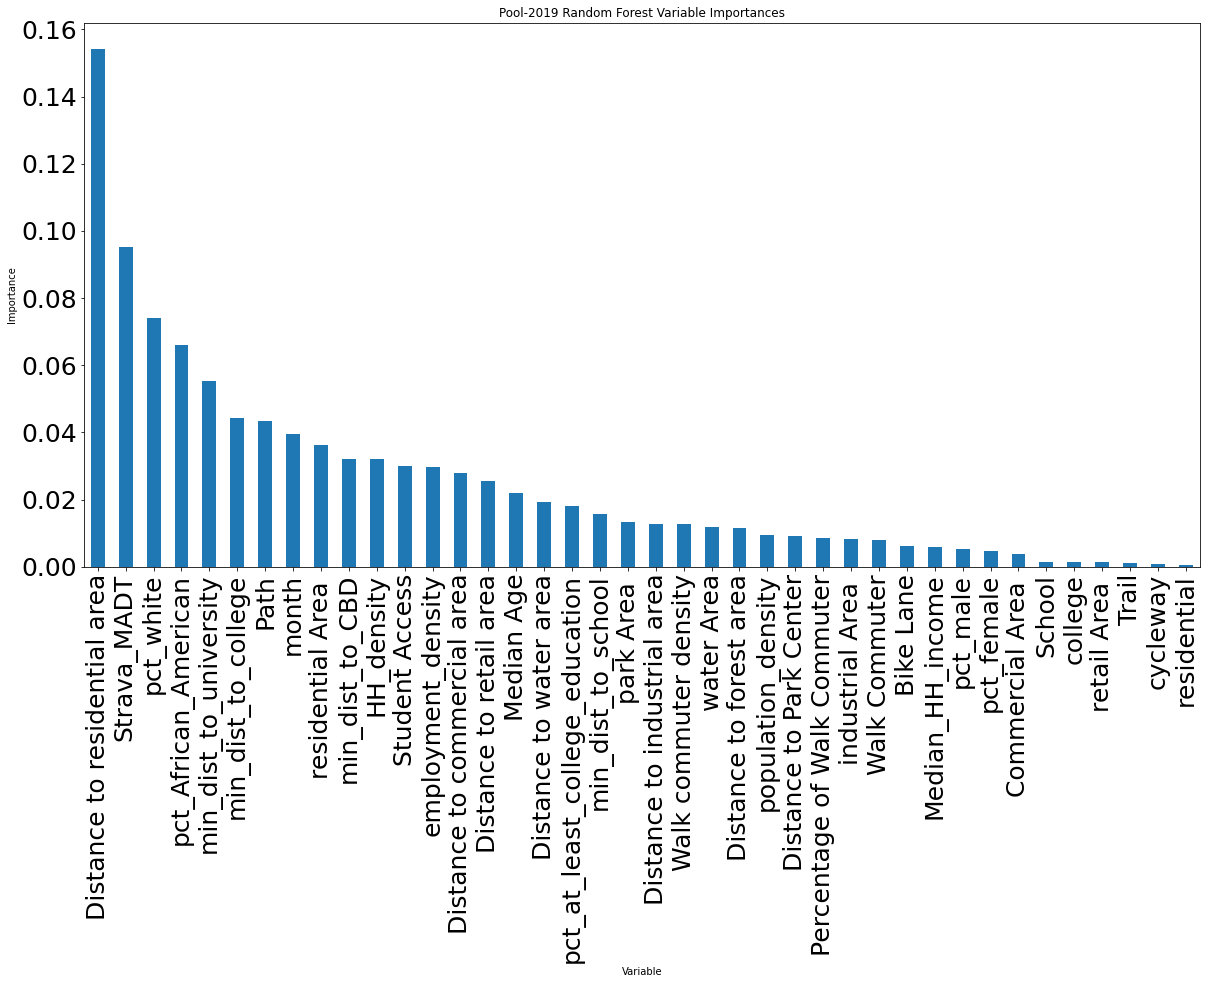

In [103]:
importances = list(brf_model.feature_importances_)# List of tuples with variable and importance 
feature_importances = [(features2, round(importance, 4)) for feature, importance in zip(feature_list2, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importances_dfp = pd.DataFrame(brf_model.feature_importances_, index=X_data2.columns, columns=[
                                      'Importance']).sort_values('Importance', ascending=False)
feature_importances_dfp[0:40].plot(kind='bar', figsize=(20, 10), style='fivethirtyeight', fontsize=25, legend=False,
                            title= "Pool-2019 Random Forest Variable Importances", ylabel="Importance", xlabel="Variable")

In [104]:
feature_importances_dfp=feature_importances_dfp.rename(columns={'Importance': 'Ped_Var_Importance'})
feature_importances_dfp['var']=feature_importances_dfp.index
feature_importances_dfp.head()

,Ped_Var_Importance,var
Distance to residential area,0.154149,Distance to residential area
Strava_MADT,0.095268,Strava_MADT
pct_white,0.074212,pct_white
pct_African_American,0.066054,pct_African_American
min_dist_to_university,0.055397,min_dist_to_university


In [105]:
var_import=pd.merge(feature_importances_dfb,feature_importances_dfp, on=['var'], how='inner')
var_import.head()

,Bike_Var_Importance,var,Ped_Var_Importance
0,0.235870,min_dist_to_college,0.044216
1,0.113325,Strava_MADT,0.095268
2,0.080894,HH_density,0.032021
3,0.057594,water Area,0.011986
4,0.042610,min_dist_to_CBD,0.032113


In [107]:
var_import.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/bike_ped_RF_model_Variable_Importance.csv')

# Apply Pedestrian RF Model

In [93]:
# read 
papp=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_imputation_model_application_data.csv')
papp1=papp[['month',  'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'forest Area ',
       'Distance to forest area', 'water Area', 'Distance to water area',
       'park Area ', 'Distance to Park Center', 'School', 'min_dist_to_school',
       'college', 'min_dist_to_college', 'University',
       'min_dist_to_university', 'pct_white', 'pct_African_American',
       'pct_male', 'pct_female', 'Student Access',
       'pct_at_least_college_education', 'HH_density', 'Median_HH_income',
       'population_density', 'Median Age', 'employment_density',
       'Walk Commuter', 'Percentage of Walk Commuter', 'Walk commuter density',
       'Strava_MADT', 'Path',  'Bike Route', 'Bike Lane',
       'Cycle Track', 'Trail', 'cycleway', 'secondary', 'tertiary', 'primary',
       'residential', 'service', 'trunk']]

In [94]:
papp['ID'].nunique()

74

In [95]:
check=papp.loc[papp['ID']==62864]
check

,Unnamed: 0.1,ID,latitude,longitude,geometry,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,...,Bike Lane,Cycle Track,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk
85,87,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
86,88,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
87,89,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
88,90,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
89,91,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
90,92,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
91,93,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
92,94,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0
93,95,62864,32.958621,-117.264844,POLYGON ((-117.26056121393697 32.9584239183241...,80.09568,0.00459,0.133178,0.00362,0.056748,...,0,0,0,0,0,0,0,0,0,0


In [96]:
track=papp[["ID"]]

In [97]:
predictions = brf_model.predict(papp1)
predictions1 = pd.DataFrame({'Predicted_MADPT': predictions})
pred=pd.concat([papp1,predictions1, track],axis=1)
pred.head()

,month,min_dist_to_CBD,Commercial Area,Distance to commercial area,retail Area,Distance to retail area,industrial Area,Distance to industrial area,residential Area,Distance to residential area,...,Trail,cycleway,secondary,tertiary,primary,residential,service,trunk,Predicted_MADPT,ID
0,1,30.272075,0.0,4.980704,0.0,5.164795,0.0,4.968207,0.00945,0.206389,...,0,0,0,0,0,0,0,0,509.537240,2696
1,1,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,503.216391,2698
2,2,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,549.545338,2698
3,3,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,527.358901,2698
4,4,19.164520,0.0,5.609606,0.0,5.510134,0.0,6.176963,0.00000,3.278090,...,0,0,0,0,0,0,0,0,525.186301,2698


In [98]:
pred_save=pred[['ID','month','Predicted_MADPT']]
pred_save.to_csv('C:/UC Berkeley Project Backup/AT Census/Lindsey _QA/QC Article Analysis/Variables/RF_Imputation_model_data/ped_MADPT_Prediction.csv')

In [99]:
pred_save['Predicted_MADPT'].describe()

count     198.000000
mean      579.907991
std       642.331462
min        48.116509
25%       302.150013
50%       340.502951
75%       558.667181
max      4695.751594
Name: Predicted_MADPT, dtype: float64

# End of the Modeling